In [1]:
# Modeling
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns

# Feature Selection
import xgboost as xgb
from sklearn.decomposition import PCA

# Evaluate Algorithms

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
from acquire_prepare import acquire_oil
from acquire_prepare import prep_data

import model
import numpy as np
import pandas as pd

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import sys 

**Let's bring in the DataFrame**

In [3]:
df = acquire_oil()
df = prep_data(df)

**(Rows, Columns)**

In [4]:
df.shape

(7888, 62)

**We need to make sure the numberic types are correct**

In [5]:
numerics = ['int64', 'float64']

num_df = df.select_dtypes(include=numerics)
num_df.columns

Index(['api14', 'proppant_ppf', 'frac_fluid_gpf', 'gross_perfs', 'frac_stages',
       'oil_gravity', 'peak_boepd', 'oil_hist', 'gas_hist', 'gor_hist',
       'ip90_boeqpd', 'tvd', 'sur_lat', 'sur_long', 'well_id', 'mid_point_lat',
       'mid_point_long', 'recovery', 'recovery_per_foot', 'months_active',
       'recovery_per_month', 'vintage', 'vintage_bin', 'encoded_direction',
       'encoded_frac_fluid_type', 'encoded_county', 'encoded_oper',
       'encoded_formation', 'encoded_sub-basin', 'encoded_lateral_class',
       'scaled_direction', 'scaled_frac_fluid_type', 'scaled_county',
       'scaled_oper', 'scaled_formation', 'scaled_sub-basin',
       'scaled_lateral_class', 'scaled_proppant_ppf', 'scaled_frac_fluid_gpf',
       'scaled_gross_perfs', 'scaled_frac_stages', 'scaled_oil_gravity',
       'scaled_gor_hist', 'scaled_tvd', 'scaled_mid_point_lat',
       'scaled_mid_point_long', 'scaled_vintage'],
      dtype='object')

In [6]:
num_df = num_df.drop(columns=['gas_hist', 'recovery', 'recovery_per_foot', 
                              'recovery_per_month', 'api14',
                              'sur_long', 'sur_lat', 'mid_point_lat', 'mid_point_long',
                              'well_id', 'oil_hist'])

### Use LabelEncoder to encode county and frak_fluid_type

In [7]:
encoder = LabelEncoder()

encoder.fit(df.county)
num_df['county'] = encoder.transform(df.county)

num_df.head()

,proppant_ppf,frac_fluid_gpf,gross_perfs,frac_stages,oil_gravity,peak_boepd,gor_hist,ip90_boeqpd,tvd,months_active,...,scaled_frac_fluid_gpf,scaled_gross_perfs,scaled_frac_stages,scaled_oil_gravity,scaled_gor_hist,scaled_tvd,scaled_mid_point_lat,scaled_mid_point_long,scaled_vintage,county
30,1311.78809,1642.58887,3977.0,0.0,0.0,61.408554,1738.53259,47.452900,10021.0,33,...,0.547863,0.292627,0.000000,0.0,0.087056,0.745943,0.614855,0.580622,0.966667,0
31,1088.56238,1493.36900,7283.0,0.0,0.0,416.961182,1381.57100,351.796700,9764.0,66,...,0.498082,0.536127,0.000000,0.0,0.069179,0.726813,0.517410,0.581774,0.916667,0
32,951.97060,1369.34363,7382.0,0.0,0.0,838.371765,1961.41300,688.525400,10798.0,64,...,0.456706,0.543419,0.000000,0.0,0.098218,0.803781,0.587606,0.571086,0.916667,0
33,1155.36267,1299.68433,7382.0,31.0,0.0,438.325684,1325.53870,406.427765,9506.0,63,...,0.433468,0.543419,0.442857,0.0,0.066373,0.707608,0.592304,0.570250,0.916667,0
34,1284.25537,1596.72742,7050.0,0.0,0.0,443.969543,2816.79077,289.934052,10138.0,59,...,0.532564,0.518966,0.000000,0.0,0.141055,0.754652,0.576165,0.563362,0.933333,0


In [8]:
encoder = LabelEncoder()
encoder.fit(df.frac_fluid_type)
num_df['frac_fluid_type'] = encoder.transform(df.frac_fluid_type)
num_df.head()

,proppant_ppf,frac_fluid_gpf,gross_perfs,frac_stages,oil_gravity,peak_boepd,gor_hist,ip90_boeqpd,tvd,months_active,...,scaled_gross_perfs,scaled_frac_stages,scaled_oil_gravity,scaled_gor_hist,scaled_tvd,scaled_mid_point_lat,scaled_mid_point_long,scaled_vintage,county,frac_fluid_type
30,1311.78809,1642.58887,3977.0,0.0,0.0,61.408554,1738.53259,47.452900,10021.0,33,...,0.292627,0.000000,0.0,0.087056,0.745943,0.614855,0.580622,0.966667,0,7
31,1088.56238,1493.36900,7283.0,0.0,0.0,416.961182,1381.57100,351.796700,9764.0,66,...,0.536127,0.000000,0.0,0.069179,0.726813,0.517410,0.581774,0.916667,0,3
32,951.97060,1369.34363,7382.0,0.0,0.0,838.371765,1961.41300,688.525400,10798.0,64,...,0.543419,0.000000,0.0,0.098218,0.803781,0.587606,0.571086,0.916667,0,0
33,1155.36267,1299.68433,7382.0,31.0,0.0,438.325684,1325.53870,406.427765,9506.0,63,...,0.543419,0.442857,0.0,0.066373,0.707608,0.592304,0.570250,0.916667,0,3
34,1284.25537,1596.72742,7050.0,0.0,0.0,443.969543,2816.79077,289.934052,10138.0,59,...,0.518966,0.000000,0.0,0.141055,0.754652,0.576165,0.563362,0.933333,0,7


### Standardize Numeric Data

In [9]:
scaled_df = num_df.copy()

scaled_df['proppant_ppf'] = (scaled_df.proppant_ppf - scaled_df.proppant_ppf.min()) / (scaled_df.proppant_ppf.max() - scaled_df.proppant_ppf.min())
scaled_df['frac_fluid_gpf'] = (scaled_df.frac_fluid_gpf - scaled_df.frac_fluid_gpf.min()) / (scaled_df.frac_fluid_gpf.max() - scaled_df.frac_fluid_gpf.min())
scaled_df['tvd'] = (scaled_df.tvd - scaled_df.tvd.min()) / (scaled_df.tvd.max() - scaled_df.tvd.min())
scaled_df['frac_stages'] = (scaled_df.frac_stages - scaled_df.frac_stages.min()) / (scaled_df.frac_stages.max() - scaled_df.frac_stages.min())
scaled_df['oil_gravity'] = (scaled_df.oil_gravity - scaled_df.oil_gravity.min()) / (scaled_df.oil_gravity.max() - scaled_df.oil_gravity.min())
scaled_df['peak_boepd'] = (scaled_df.peak_boepd - scaled_df.peak_boepd.min()) / (scaled_df.peak_boepd.max() - scaled_df.peak_boepd.min())
scaled_df['gor_hist'] = (scaled_df.gor_hist - scaled_df.gor_hist.min()) / (scaled_df.gor_hist.max() - scaled_df.gor_hist.min())
scaled_df['ip90_boeqpd'] = (scaled_df.ip90_boeqpd - scaled_df.ip90_boeqpd.min()) / (scaled_df.ip90_boeqpd.max() - scaled_df.ip90_boeqpd.min())
scaled_df['months_active'] = (scaled_df.months_active - scaled_df.months_active.min()) / (scaled_df.months_active.max() - scaled_df.months_active.min())
scaled_df['vintage'] = (scaled_df.vintage - scaled_df.vintage.min()) / (scaled_df.vintage.max() - scaled_df.vintage.min())

In [10]:
xgb_df = scaled_df.copy()

### XGBoost Feature Recommender

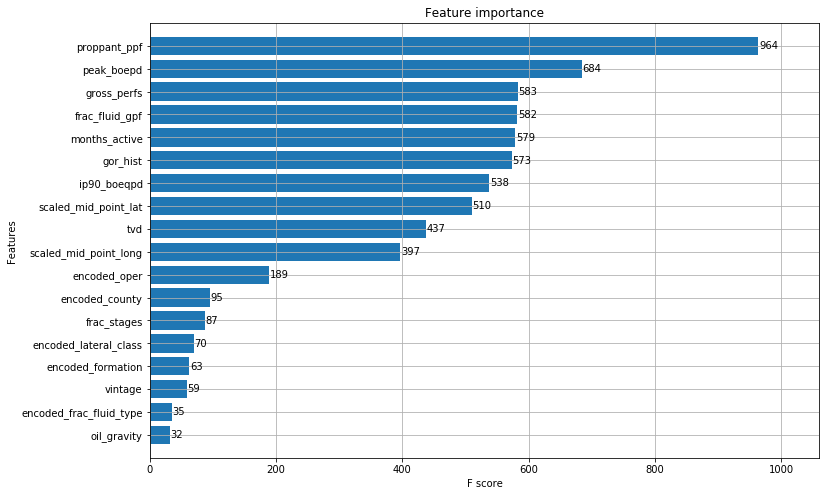

In [11]:
xgb_params = {
    'max_depth': 8,
    'seed' : 493
}

dtrain = xgb.DMatrix(xgb_df, df.oil_hist, feature_names=xgb_df.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=50)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,8))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

# Test Harness and Options

In [10]:
xfeatures = ['proppant_ppf', 'frac_fluid_gpf', 'gor_hist', 'tvd', 'sur_lat', 'mid_point_lat', 'mid_point_long', 'sur_long', 'encoded_oper', 'encoded_direction', 'vintage', 'gross_perfs']
yfeature = ['recovery']

### Results for the entire dataframe to use as a baseline before clustering

Logistic Regression Model:
This regression model accounts for 27.76% of the variance in recovery with the selected features.
-----
Cross-validation Scores: [0.28841154 0.24584862 0.28595999]
-----
The Coefficients of Variation: [[ 8.06029842e-03  7.78511902e-03  5.10354334e-03  1.15534555e-02
  -4.38431594e+02  4.69631437e+02  2.33028731e+03 -2.36404799e+03
  -1.10018582e-01  6.69020602e+01 -2.24497837e+00  2.08220019e-02]]


Ridge Regression Model:
This regression model accounts for 27.62% of the variance in recovery with the selected features.
-----
Cross-validation Scores: [0.28771523 0.24438187 0.28420503]
-----
The Coefficients of Variation: [[ 7.84709009e-03  8.34689331e-03  5.17017398e-03  1.15783019e-02
  -2.52499867e+01  5.66460705e+01  3.99474026e+01 -7.30493173e+01
  -1.07953764e-01  6.68170450e+01 -2.23125933e+00  2.06552122e-02]]


Polynomial Regression Model:
The model performance for the training set
-------------------------------------------
RMSE of training set is 99.

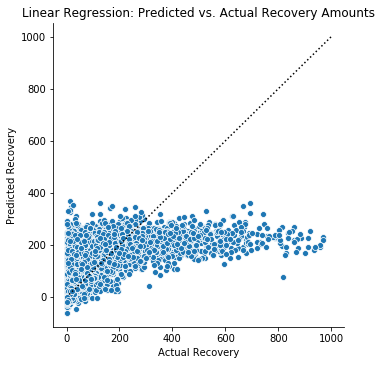

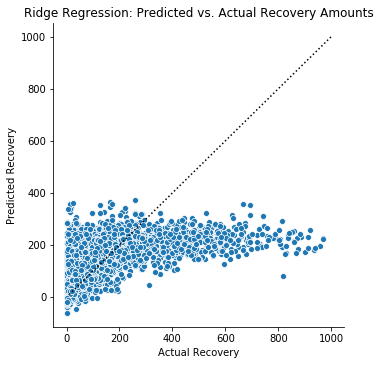

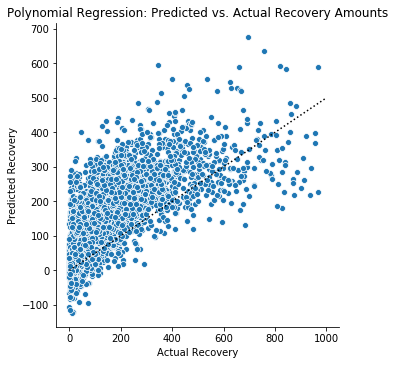

In [11]:
model.run_models(df, xfeatures, yfeature, 0.80)

**Let's Cluster by our Top Seven features per our XGBoost function**

In [12]:
col_list = ['scaled_proppant_ppf', 'scaled_gross_perfs', 'scaled_tvd', 'scaled_frac_fluid_gpf', 
            'scaled_gor_hist', 'encoded_oper', 'scaled_vintage']

**We now have a new dataframe with an added column "cluster_id"**

In [13]:
df = model.create_kclusters(df, col_list, 3, 'cluster_id')

**Let's see how many oberservations we have in each cluster**

In [14]:
df.cluster_id.value_counts()

0    3693
2    2331
1    1864
Name: cluster_id, dtype: int64

In [15]:
df.to_excel('CapstoneDataFinal.xlsx')

# ALL Regression Types on Each Cluster

### Cluster 0: 2331 Oberservations 

In [16]:
cluster_zero = df[df['cluster_id'] == 0]

Logistic Regression Model:
This regression model accounts for 30.11% of the variance in recovery with the selected features.
-----
Cross-validation Scores: [0.28614013 0.27080011 0.3255136 ]
-----
The Coefficients of Variation: [[ 1.62890942e-02  2.33847206e-03  5.99180368e-03  1.07188473e-02
  -8.32944069e+02  8.64385972e+02  3.70789250e+03 -3.75703724e+03
  -1.80954844e-02  3.92416896e+01 -3.02235351e+00  1.75751979e-02]]


Ridge Regression Model:
This regression model accounts for 29.90% of the variance in recovery with the selected features.
-----
Cross-validation Scores: [0.29282988 0.26988784 0.3196303 ]
-----
The Coefficients of Variation: [[ 1.60728300e-02  3.00647029e-03  6.43671623e-03  1.02479510e-02
  -4.21135512e+01  7.65170566e+01  1.91299602e+01 -7.07617995e+01
  -2.91043041e-02  5.28367109e+01 -2.06954441e+00  1.76037547e-02]]


Polynomial Regression Model:
The model performance for the training set
-------------------------------------------
RMSE of training set is 98.

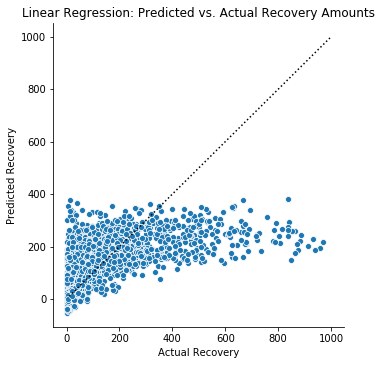

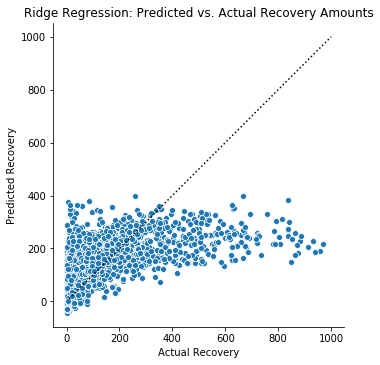

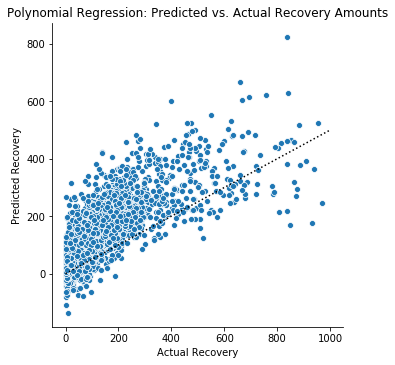

In [17]:
model.run_models(cluster_zero, xfeatures, yfeature, 0.70)

### Cluster 1: 3693 Observations

In [18]:
cluster_one = df[df['cluster_id'] == 1]

Logistic Regression Model:
This regression model accounts for 26.95% of the variance in recovery with the selected features.
-----
Cross-validation Scores: [0.26427131 0.171328   0.30678772]
-----
The Coefficients of Variation: [[ 1.00968527e-02  8.69437837e-03  3.14426359e-03  9.48379208e-03
   6.09235269e+01 -3.78271792e+01  2.53723070e+03 -2.55124770e+03
  -2.43624409e-01  3.64920864e+01 -1.07448185e+00  1.47777232e-02]]


Ridge Regression Model:
This regression model accounts for 26.84% of the variance in recovery with the selected features.
-----
Cross-validation Scores: [0.26862853 0.1743481  0.29909387]
-----
The Coefficients of Variation: [[ 9.70402106e-03  8.32725711e-03  2.92799847e-03  1.00126109e-02
   3.82076690e+01 -1.39862463e+01  1.09005663e+01 -2.17554094e+01
  -2.55904004e-01  1.92448678e+01 -1.90269981e+00  1.44288414e-02]]


Polynomial Regression Model:
The model performance for the training set
-------------------------------------------
RMSE of training set is 61.

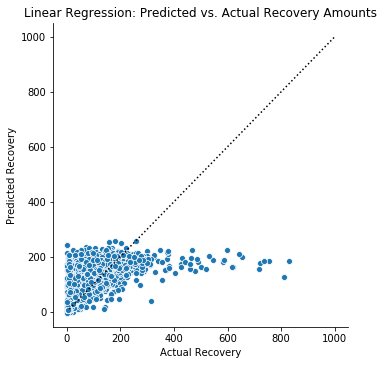

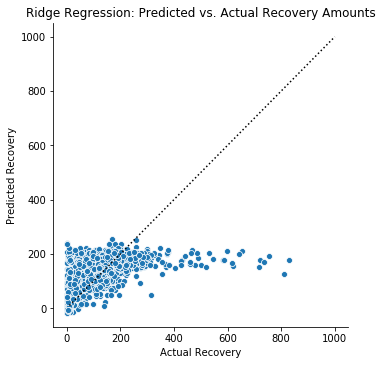

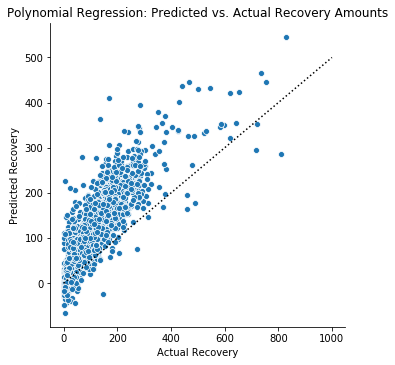

In [19]:
model.run_models(cluster_one, xfeatures, yfeature, 0.70)

### Cluster 2: 1864 Observations

In [20]:
cluster_two = df[df['cluster_id'] == 2]

Logistic Regression Model:
This regression model accounts for 28.26% of the variance in recovery with the selected features.
-----
Cross-validation Scores: [0.27300269 0.27447259 0.2572935 ]
-----
The Coefficients of Variation: [[ 3.09729348e-03  1.09356503e-02  4.46935316e-03  9.62892664e-03
   1.21463363e+02 -1.06527227e+02  3.53478492e+02 -3.63040233e+02
  -6.16063722e-01  9.45594448e+01 -7.27836856e-01  2.62502348e-02]]


Ridge Regression Model:
This regression model accounts for 28.51% of the variance in recovery with the selected features.
-----
Cross-validation Scores: [0.27666001 0.27971108 0.2595882 ]
-----
The Coefficients of Variation: [[ 5.46571907e-03  1.10480498e-02  3.90338387e-03  9.73051965e-03
   3.54706132e+01 -2.03994308e+01  5.47239393e+00 -8.35109351e+00
  -5.98328064e-01  6.95751748e+01 -2.11436249e+00  2.58815743e-02]]


Polynomial Regression Model:
The model performance for the training set
-------------------------------------------
RMSE of training set is 93.

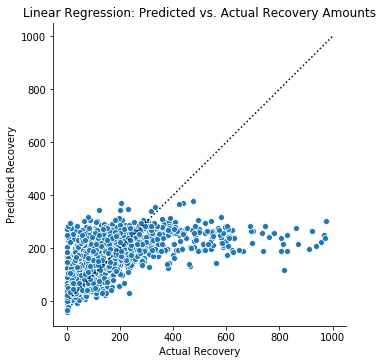

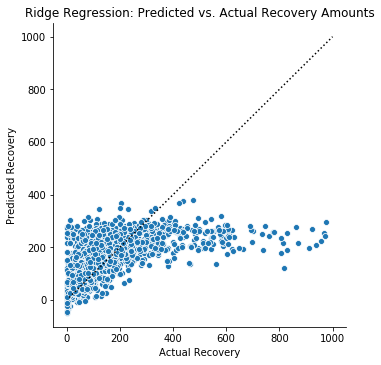

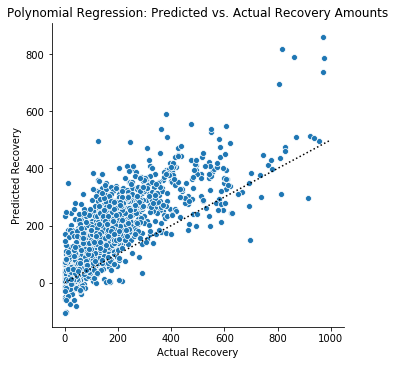

In [21]:
model.run_models(cluster_two, xfeatures, yfeature, 0.70)

## Interpret and report results

# Improve Results

## Algorithm Tuning

## Ensemble Methods

### Bagging

### Boosting

### Blending

## Extreme Feature Engineering